<a href="https://colab.research.google.com/github/shahpranshu27/HandsOn_ML/blob/main/Magic_Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset is from UCI Machine Learning Repository

(https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/magic04.data", names=cols)

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"] = (df["class"] == "g").astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


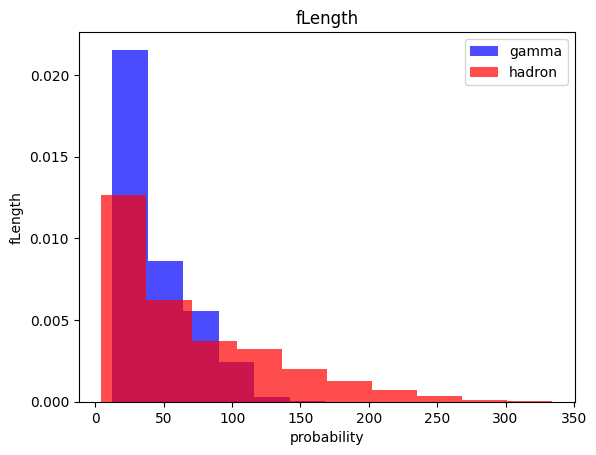

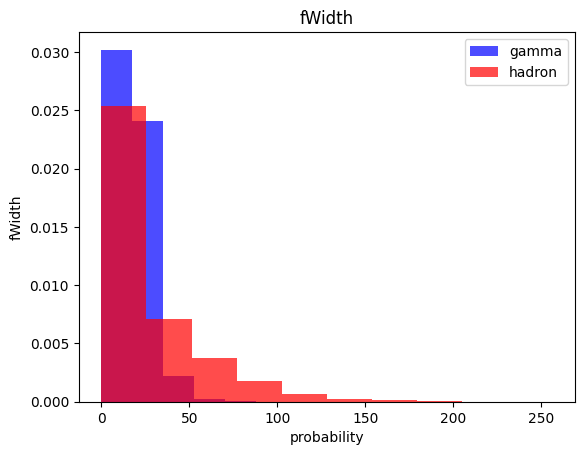

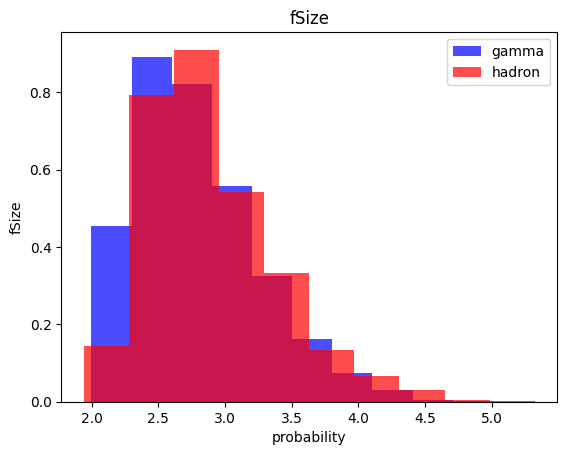

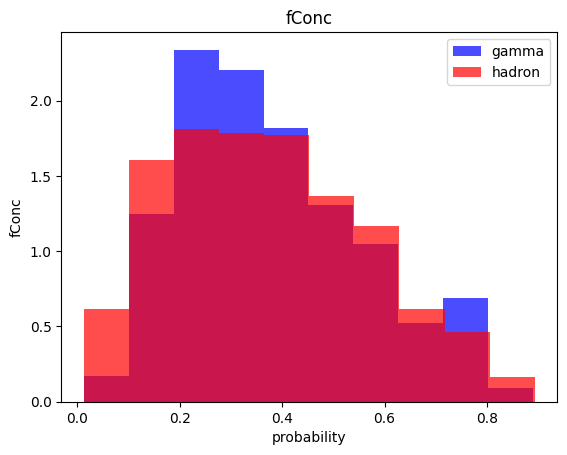

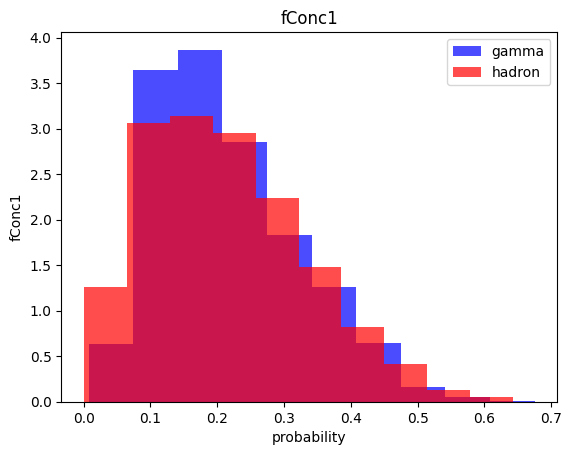

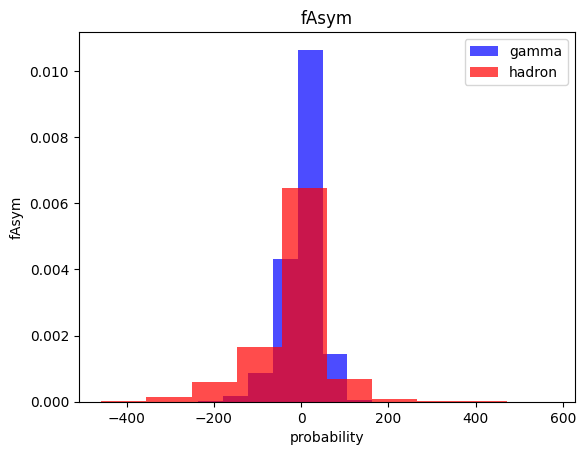

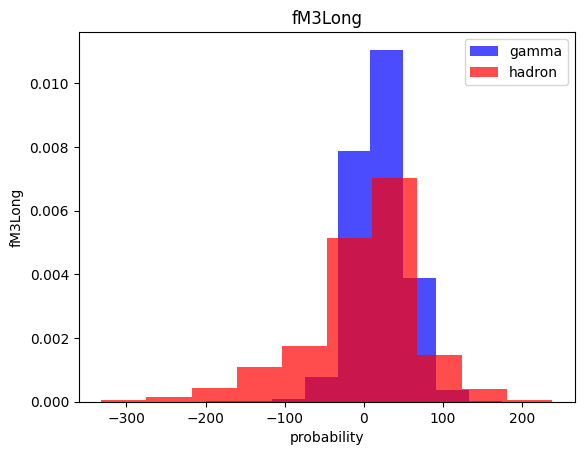

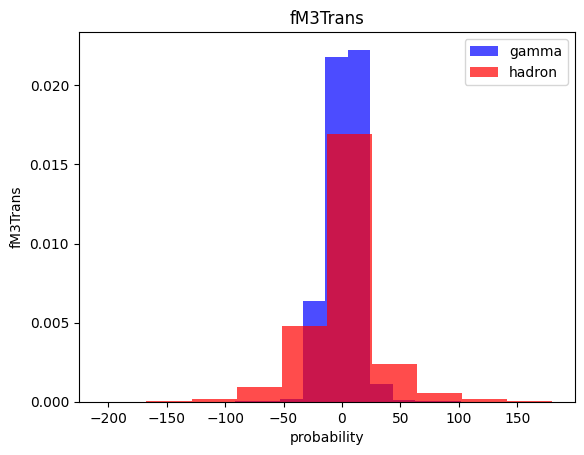

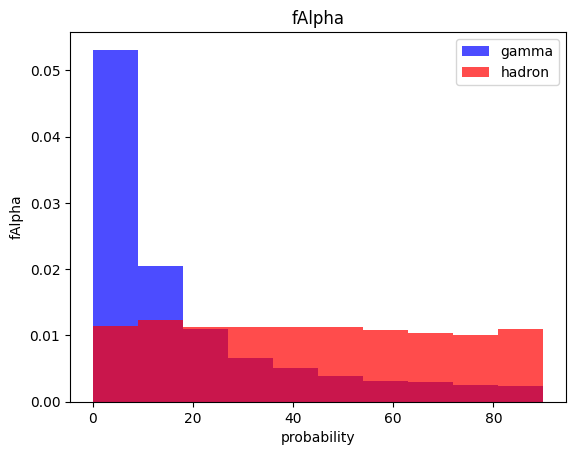

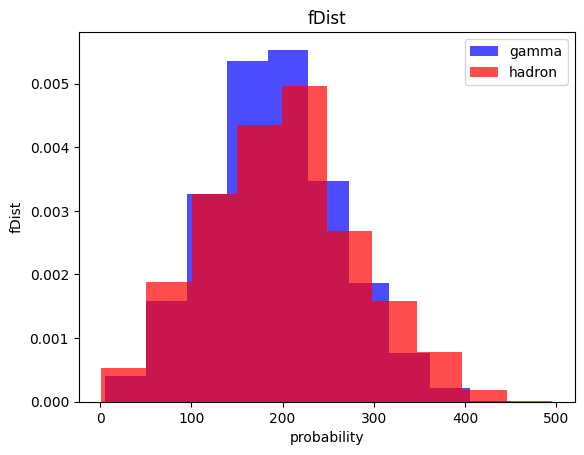

In [5]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.xlabel("probability")
  plt.ylabel(label)
  plt.legend()
  plt.show()

# Train, validate, test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)
  data = np.hstack((X, np.reshape(Y, (-1, 1))))

  return data, X, Y

In [8]:
# print(len(train[train["class"]==1])) # gamma
# print(len(train[train["class"]==0])) # hadron
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [9]:
len(Y_train)

14946

In [10]:
sum(Y_train == 1)

7473

In [11]:
sum(Y_train == 0)

7473

# kNN (k Nearest Neightbours)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
Y_pred = knn_model.predict(X_test)

In [15]:
Y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [16]:
Y_test

array([1, 1, 1, ..., 1, 0, 1])

In [17]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1362
           1       0.85      0.86      0.86      2442

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



### True Positives (TP):
- **Definition**: These are the cases where the actual class of the data point is positive (1) and the model also predicts it as positive.
- **Example**: If a model correctly identifies 30 out of 50 actual cases of cancer (where cancer is the positive class), then TP = 30.

### True Negatives (TN):
- **Definition**: These are the cases where the actual class of the data point is negative (0) and the model also predicts it as negative.
- **Example**: If a model correctly identifies 50 out of 50 non-cancer cases, then TN = 50.

### False Positives (FP):
- **Definition**: These are the cases where the actual class of the data point is negative (0) but the model predicts it as positive.
- **Example**: If a model incorrectly predicts 5 out of 50 non-cancer cases as cancer, then FP = 5.

### False Negatives (FN):
- **Definition**: These are the cases where the actual class of the data point is positive (1) but the model predicts it as negative.
- **Example**: If a model incorrectly predicts 20 out of 50 cancer cases as non-cancer, then FN = 20.

### Precision:
- **Definition**: Precision measures how many of the predicted positive cases are actually positive.
- **Formula**: Precision = TP / (TP + FP)
- **Interpretation**: A high precision means that when the model predicts something as positive, it is usually correct.

### Recall:
- **Definition**: Recall measures how many of the actual positive cases the model predicts as positive.
- **Formula**: Recall = TP / (TP + FN)
- **Interpretation**: A high recall means that the model is able to identify most of the actual positives.

### Classification Report in scikit-learn:
- When you generate a classification report using scikit-learn, it provides a summary of these metrics (precision, recall, F1-score, support) for each class in your dataset.
- **Precision** in the report tells you the ratio of correctly predicted positive observations to the total predicted positives.
- **Recall** in the report tells you the ratio of correctly predicted positive observations to the all observations in actual class.

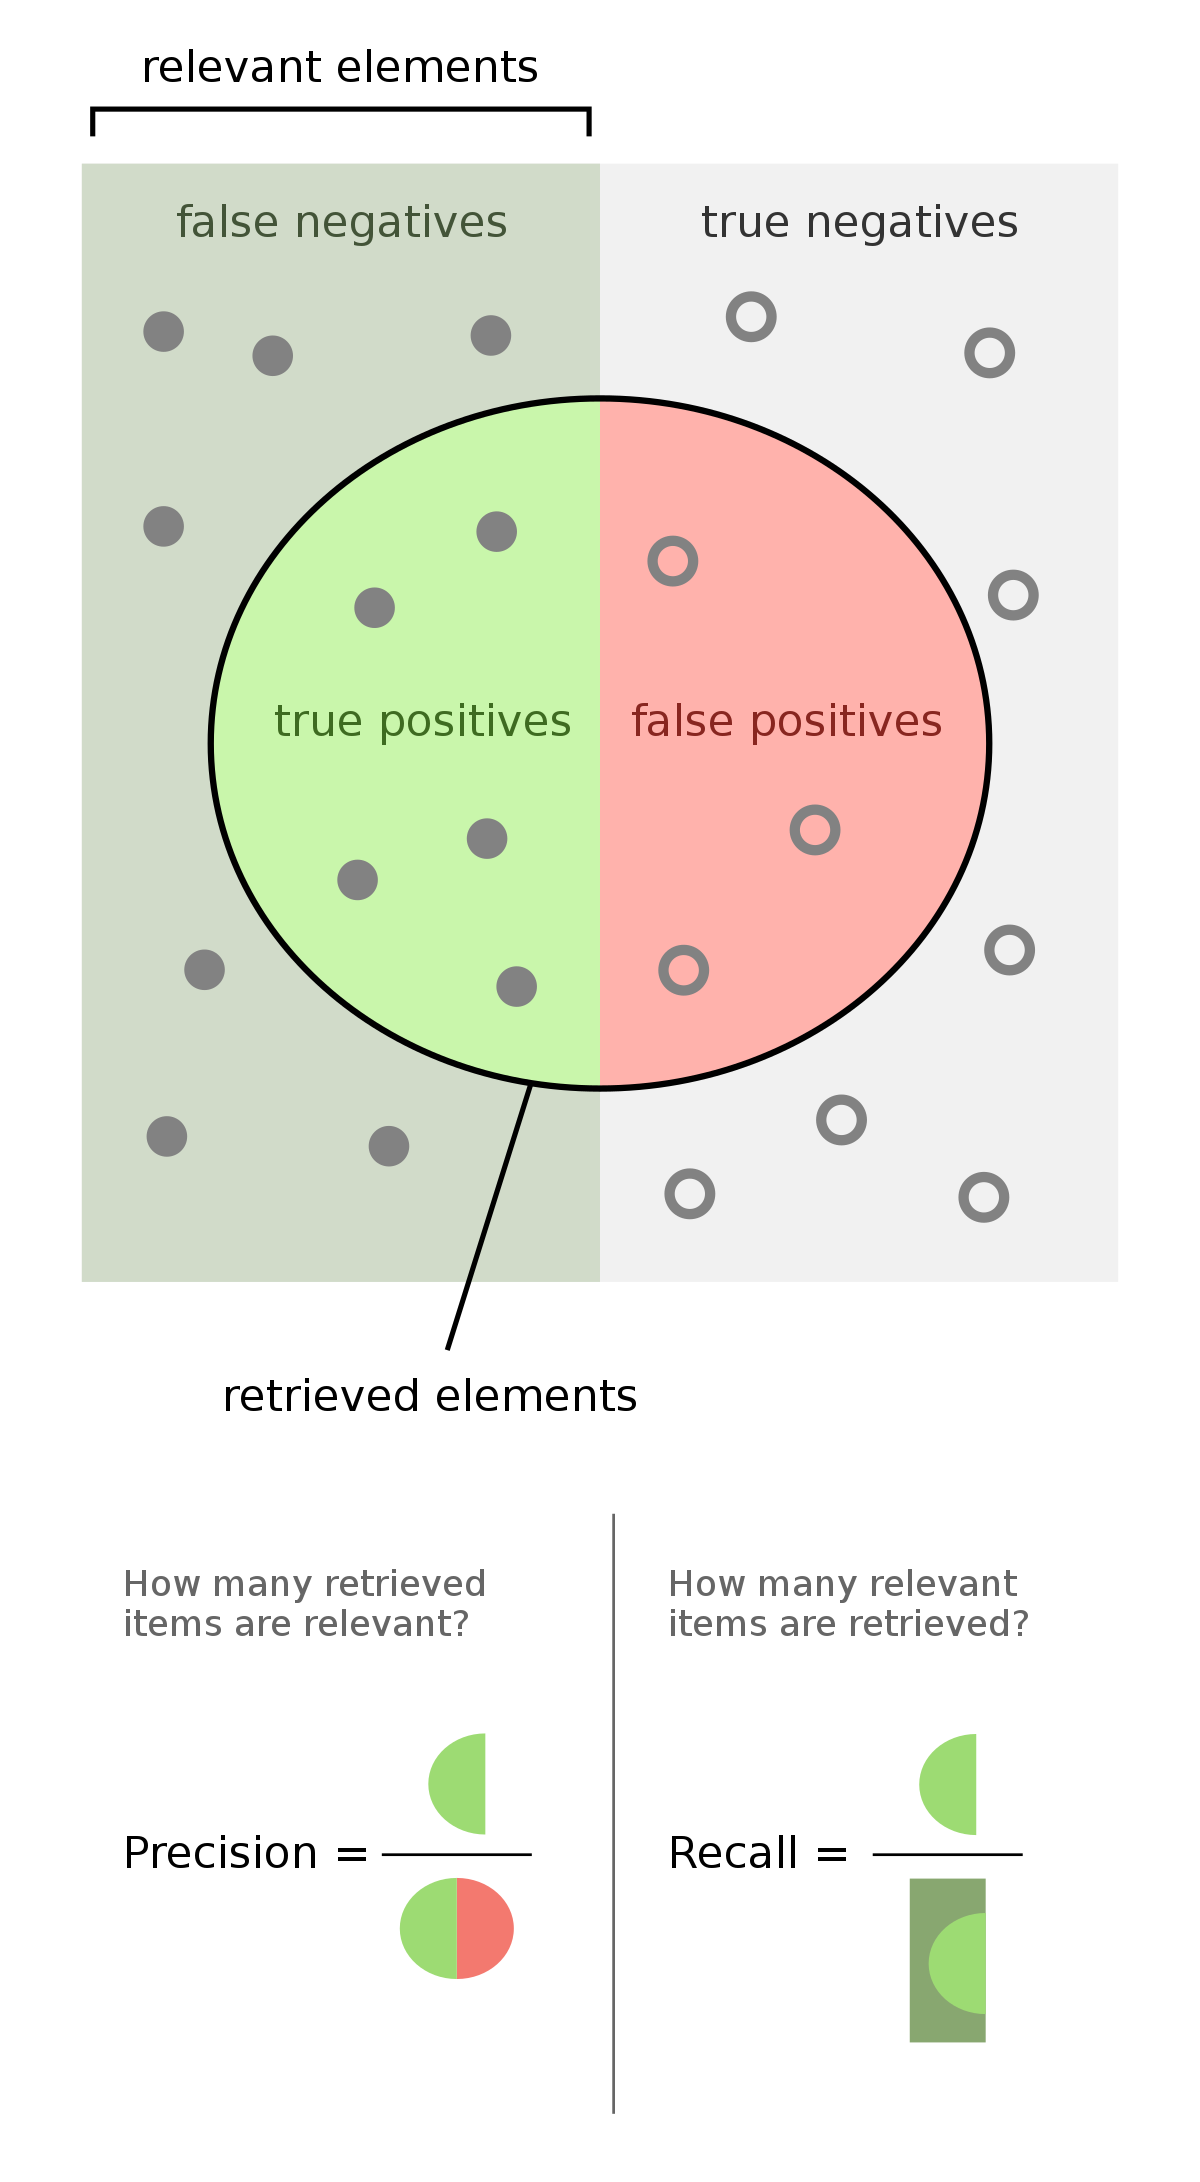

# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [21]:
y_pred = nb_model.predict(X_test)

In [22]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [24]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.43      0.54      1362
           1       0.74      0.91      0.82      2442

    accuracy                           0.74      3804
   macro avg       0.74      0.67      0.68      3804
weighted avg       0.74      0.74      0.72      3804



# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, Y_train)

In [27]:
y_pred = lr_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1362
           1       0.85      0.83      0.84      2442

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804

